# 梯度下降法（不是一种机器学习算法）
1. 描述：一种基于搜索的最优化算法（又称最速下降法），常用来递归性地求解机器学习算法中的模型参数，即逼近最小偏差模型（无约束优化问题）
2. 作用：求解非线性方程组（最小化一个损失函数）
    - 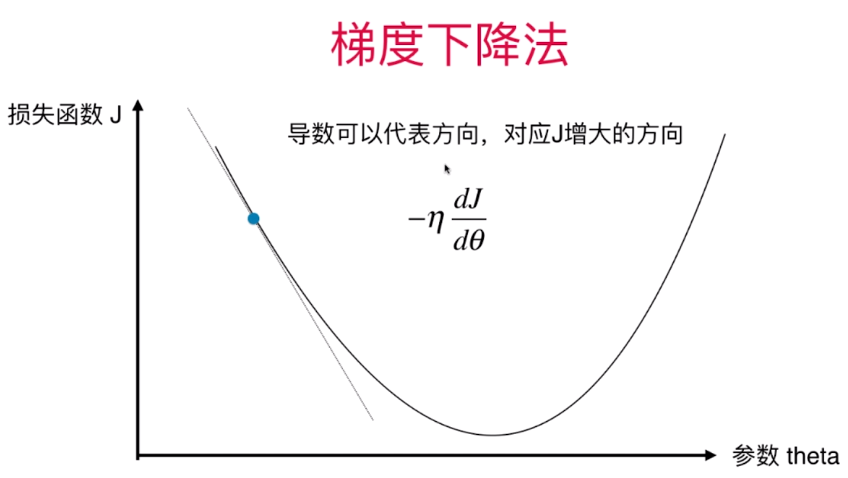
    - 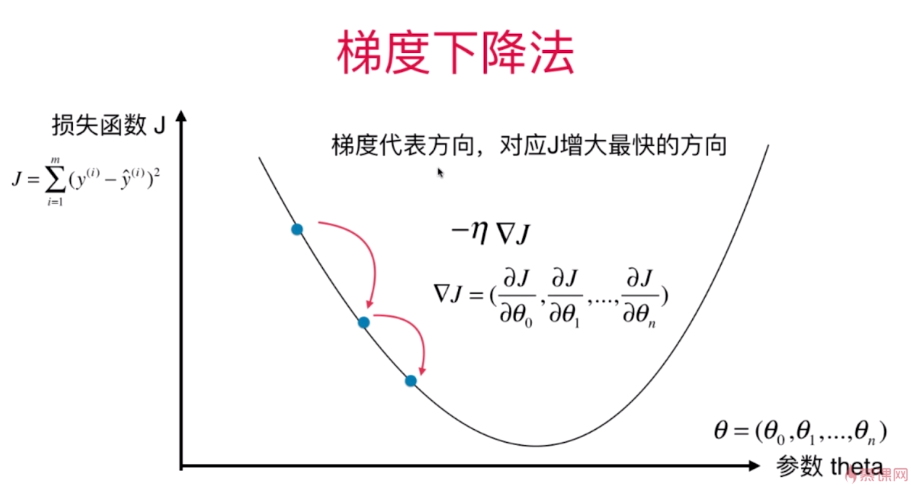

3. 分类：
    - 批量梯度下降法：适用于样本量m不太大的时候，稳定（每次使用所有样本，学习率固定）
    - 随机梯度下降法：计算量相对较小、速度更快，但不太稳定（每次随机使用1个样本，学习率递减）
    - 小批量梯度下降法：兼顾二者（每次随机计算k个梯度，多一个超参数k）
3. 超参数
    - 学习率η：影响求解速度，η太小学习速度慢，η太大可能导致不收敛
    - 初始点：一些函数具有多个极值点，则应多次运行、随机化初始点
4. 线性回归中的批量梯度下降法
    - 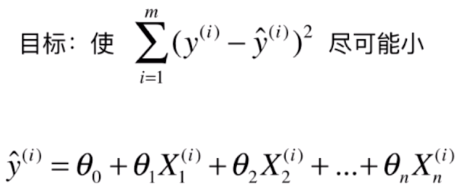
    - 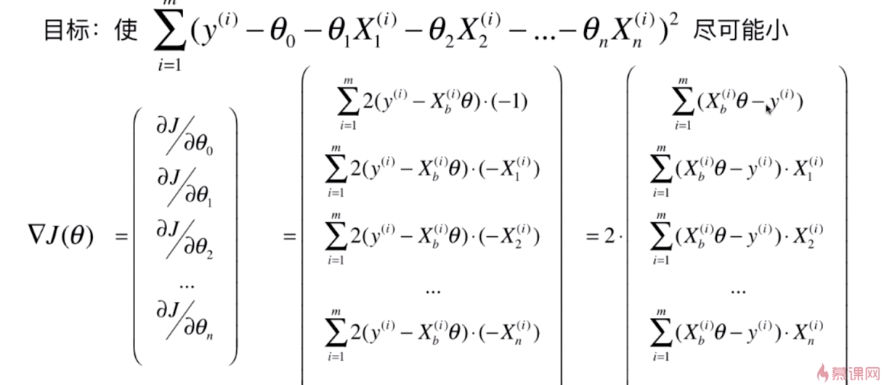
    - 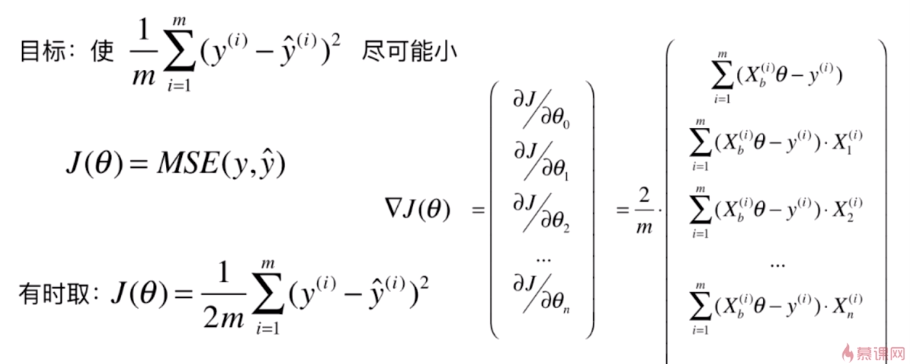
5. 向量化线性回归中的批量梯度下降法
    - 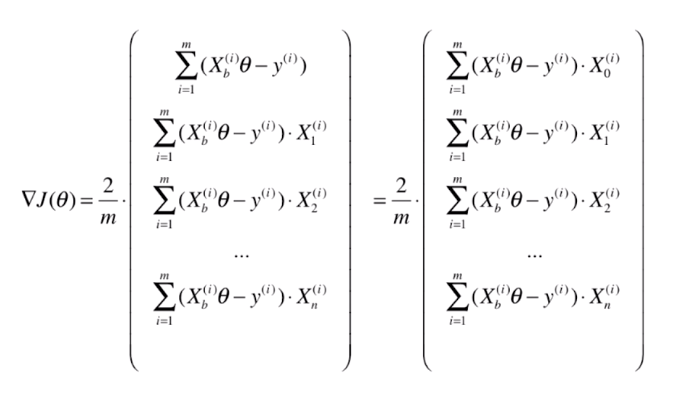
    - 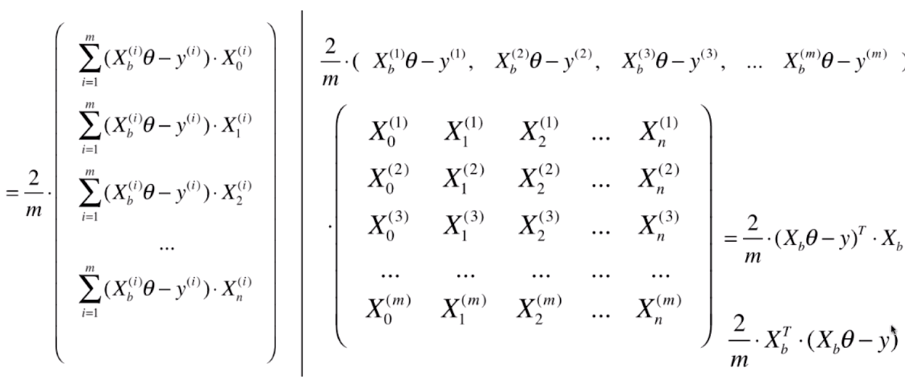
    - 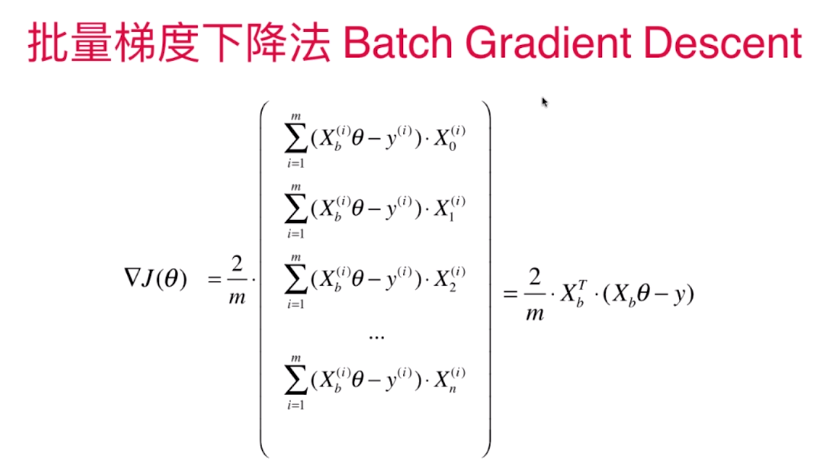
6. 数据归一化：解决数据特征不同规模问题
    - 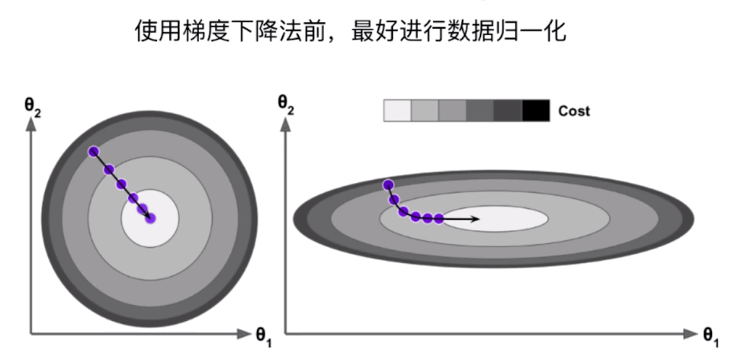

7. 线性回归中的随机梯度下降法
    - 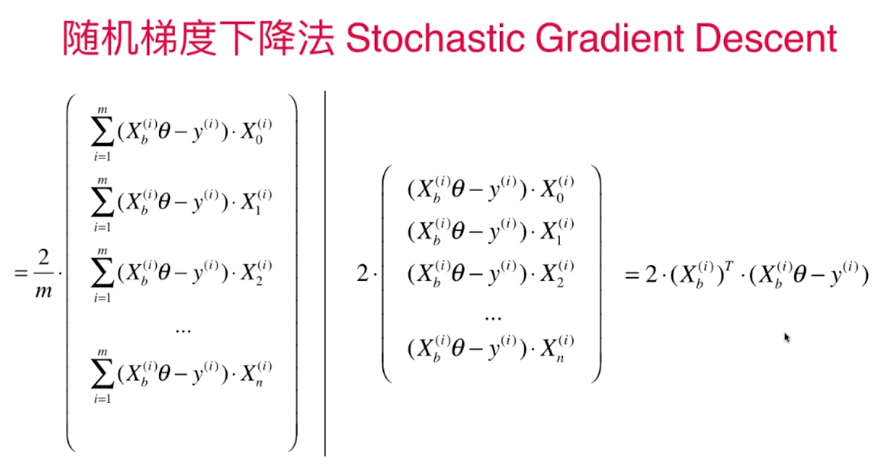
    - 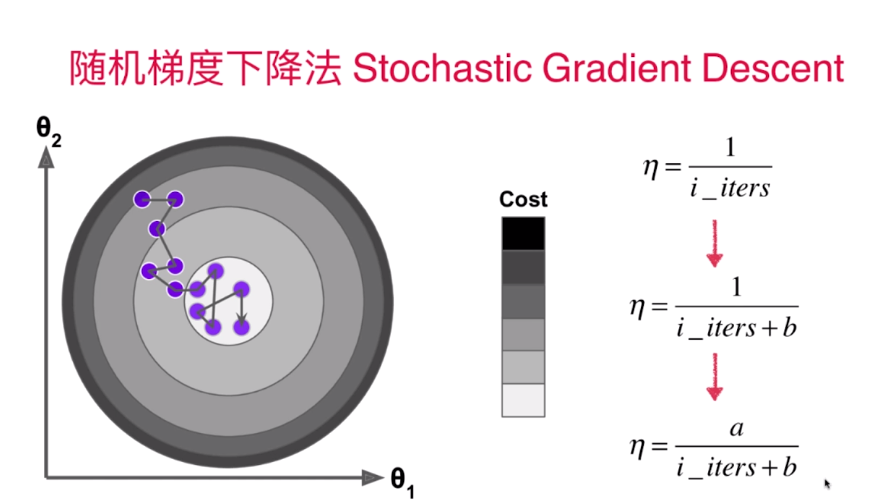

8. 对梯度的简单调试
    - 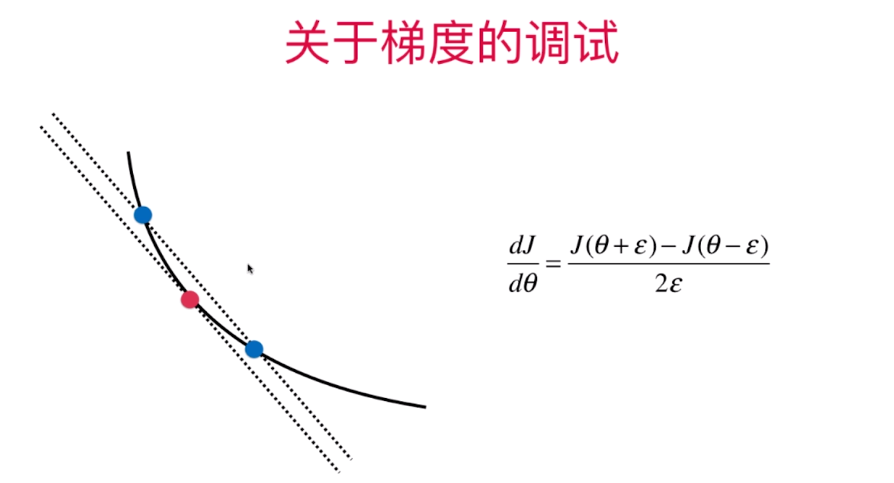
    - 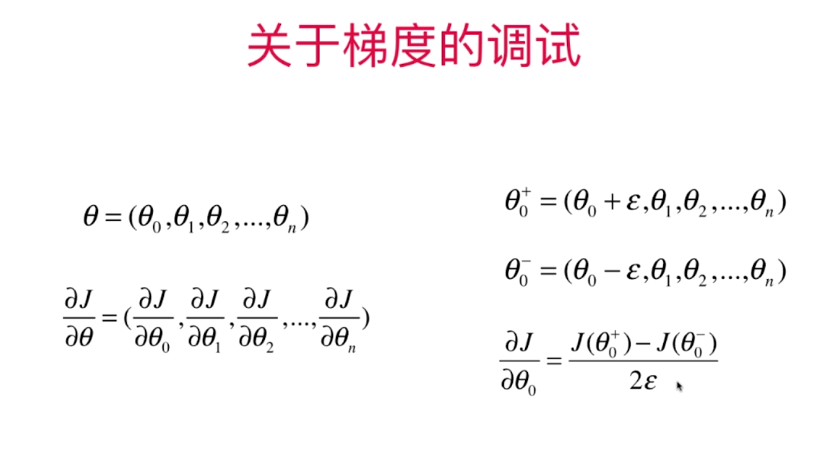

# 模拟实现批量梯度下降法

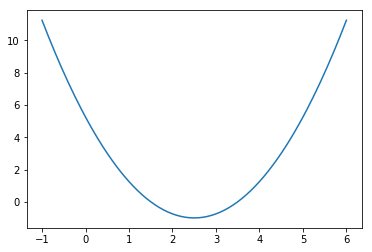

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 6, 141)
y = (x - 2.5)**2 - 1

plt.plot(x, y)
plt.show()

In [2]:
def dJ(theta):
    return 2 * (theta - 2.5)

def J(theta):
    try:
        return (theta - 2.5)**2 - 1.
    except:
        return float('inf')

def gradient_descent(init_theta, eta, n_iters=1e4, epsilon=1e-8):  
    theta = init_theta
    theta_history.append(init_theta)
    i_iter = 0  
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1
        
def plot_theta_history():
    plt.plot(x, J(x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
    plt.show()

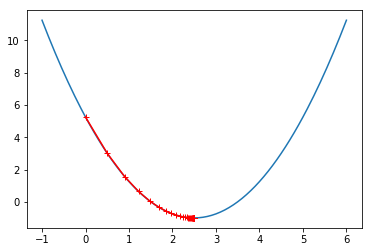

In [3]:
eta = 0.1  #学习率为0.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

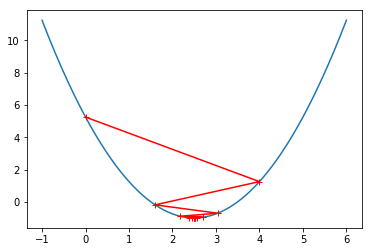

In [4]:
eta = 0.8  #学习率为0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

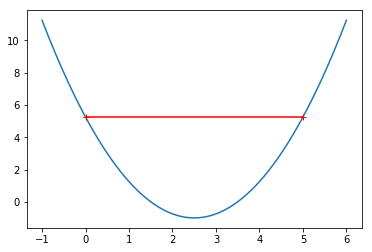

In [5]:
eta = 1.0  #学习率为1.0
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [10]:
eta = 1.1  #学习率为1.1
theta_history = []
gradient_descent(0., eta)

In [11]:
len(theta_history)

10001

In [12]:
theta_history[-1]  #最后一个θ值返回nan表示已溢出

nan

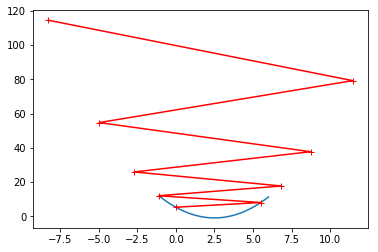

In [15]:
eta = 1.1  #学习率为1.1
theta_history = []
gradient_descent(0., eta, n_iters=8)
plot_theta_history()

# 对线性回归使用批量梯度下降法

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4 + np.random.normal(size=100)
X = x.reshape(-1, 1)
X.shape

(100, 1)

In [17]:
y.shape

(100,)

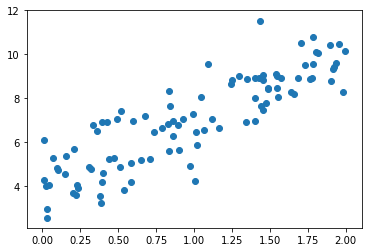

In [21]:
plt.scatter(X, y)
plt.show()

In [22]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [23]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

In [26]:
def linear_bgd(X_b, y, init_theta, eta, n_iters=1e4, epsilon=1e-8):  
    theta = init_theta
    i_iter = 0  
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [29]:
X_b = np.hstack([np.ones((len(X), 1)), X])
init_theta = np.zeros(X_b.shape[1])  #初始化θ全为0
eta = 0.01

theta = linear_bgd(X_b, y, init_theta, eta)
theta

array([ 4.02145786,  3.00706277])

# 使用梯度下降法前进行数据归一化

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50.0]
y = y[y < 50.0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

stdScaler = StandardScaler()
stdScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_std, y_train)
lin_reg.score(X_test_std, y_test)

0.80089161995190983

# 简单实现随机梯度下降法

### 一种简单模拟实现

In [13]:
import numpy as np
import matplotlib.pyplot as plt

m = 100000  #设置样本量为m

x = np.random.normal(size=m)
X = x.reshape(-1, 1)  #这里设置为只有一个特征
y = 4.0 * x + 3 + np.random.normal(0, 3, size=m)  #加上一组正态分布的噪音数据

In [14]:
def dJ_sgd(theta, X_b_i, y_i):  #计算梯度
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.0

In [16]:
def sgd(X_b, y, init_theta, max_iters=5):  #随机梯度下降
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = init_theta
    m = len(X_b)
    for cur_iter in range(max_iters):
        indexes = np.random.permutation(m)
        X_b_new = X_b[indexes]
        y_new = y[indexes]
        for i in range(m):
            gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
            theta = theta - learning_rate(cur_iter * m + i) * gradient
    return theta

In [25]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
init_theta = np.zeros(X_b.shape[1])  #初始化θ全为0
theta = sgd(X_b, y, init_theta, n_iters=5)

Wall time: 2.21 s


In [26]:
theta

array([ 2.99824349,  3.99815399])

# sklearn中的SGDRegressor

In [59]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50.0]
y = y[y < 50.0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

stdScaler = StandardScaler()
stdScaler.fit(X_train)
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

lin_reg = SGDRegressor(max_iter=100)  #循环100遍
%time lin_reg.fit(X_train_std, y_train)
lin_reg.score(X_test_std, y_test)

Wall time: 6 ms


0.80023311709571365

# 对梯度的简单调试

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.random(size=(1000, 10))
true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)  #加上噪音数据

In [20]:
X_b.shape

(1000, 11)

In [13]:
y.shape

(1000,)

In [14]:
true_theta

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

In [15]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [16]:
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2.0 / len(y)

##### 此调试函数为通用函数

In [17]:
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

In [27]:
def batch_gradient_descent(dJ, X_b, y, init_theta, eta, max_iters=1e4, epsilon=1e-8):
    theta = init_theta
    cur_iter = 0
    while cur_iter < max_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    return theta

In [29]:
X_b = np.hstack([np.ones((len(X), 1)), X])
init_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = batch_gradient_descent(dJ_debug, X_b, y, init_theta, eta)
theta  #调试函数更耗时

Wall time: 3.64 s


array([  1.1251597 ,   2.05312521,   2.91522497,   4.11895968,
         5.05002117,   5.90494046,   6.97383745,   8.00088367,
         8.86213468,   9.98608331,  10.90529198])

In [30]:
X_b = np.hstack([np.ones((len(X), 1)), X])
init_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = batch_gradient_descent(dJ, X_b, y, init_theta, eta)
theta

Wall time: 648 ms


array([  1.1251597 ,   2.05312521,   2.91522497,   4.11895968,
         5.05002117,   5.90494046,   6.97383745,   8.00088367,
         8.86213468,   9.98608331,  10.90529198])